In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
import scipy.stats as stats

In [3]:
def Emp(x, X):
    for i in range(len(X)):
        if x < X[i]:
            return i / len(X)
    return 1

def T(X, Y, Z):
    res = 0
    
    for i in range(len(Z) - 2):
        res += (Emp(Z[i + 1], X) - Emp(Z[i + 1], Y)) ** 2 / (Emp(Z[i + 1], Z) * (1 - Emp(Z[i + 1], Z)))
        
    return res / len(Z)

In [4]:
X = [stats.norm(0, 1).rvs(1000) for i in range(1000)]
Y = [stats.norm(0, 1).rvs(1000) for i in range(1000)]

BWS = [500 * T(sorted(X[i]), sorted(Y[i]), sorted(Y[i])) + 500 * T(sorted(X[i]), sorted(Y[i]), sorted(X[i])) for i in range(1000)]
BWS.sort()
X = [stats.norm(0, 1).rvs(1000) for i in range(1000)]
Y = [stats.norm(0, 1).rvs(1000) for i in range(1000)]

AD = [1000 * T(sorted(X[i]), sorted(Y[i]), sorted(sorted(X[i]) + sorted(Y[i]))) for i in range(1000)]
AD.sort()

$X_i \sim \mathcal{N}(0, 1)$, $Y_i \sim \mathcal{N}(0.1, 1)$, $n = 10$

In [5]:
N = [10, 50, 100, 1000]

n = 10


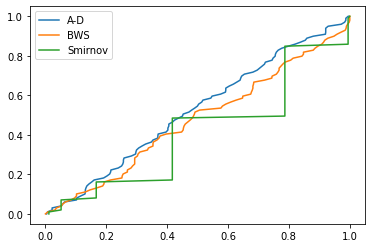

n = 50


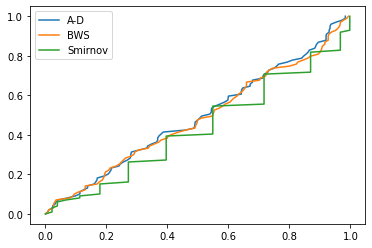

n = 100


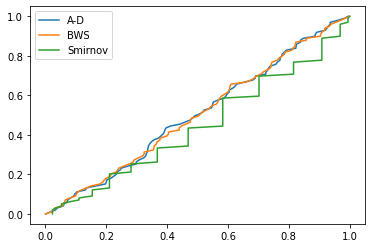

n = 1000


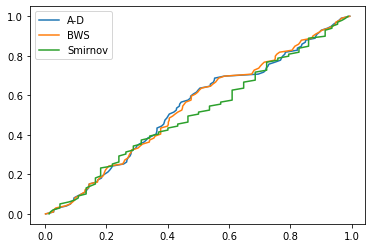

In [6]:
for n in N:
    print('n = '+str(n))
    X = []
    Y = []
    for i in range(100):
        X.append(stats.norm(0, 1).rvs(n))
        Y.append(stats.norm(0, 1).rvs(n))
    pv_sm = [stats.kstest(X[i], Y[i])[1] for i in range(100)]
    pv_sm.sort()
    AD_t = [n * T(sorted(X[i]), sorted(Y[i]), sorted(sorted(X[i]) + sorted(Y[i]))) for i in range(100)]
    pv_ad = [1 - Emp(AD_t[i], AD) for i in range(100)]
    pv_ad.sort()
    BWS_t = [n * T(sorted(X[i]), sorted(Y[i]), sorted(X[i])) / 2 + n * T(sorted(X[i]), sorted(Y[i]), sorted(Y[i])) / 2 for i in range(100)]
    pv_bws = [1 - Emp(BWS_t[i], BWS) for i in range(100)]
    pv_bws.sort()
    plt.plot(pv_ad, [i / 99 for i in range(100)], label = 'A-D')
    plt.plot(pv_bws, [i / 99 for i in range(100)], label = 'BWS')
    plt.plot(pv_sm, [i / 99 for i in range(100)], label = 'Smirnov')
    plt.legend()
    plt.show()

$X_i \sim \mathcal{N}(0, 1)$, $Y_i \sim Laplace(0, \sqrt{0.5})$

n = 10


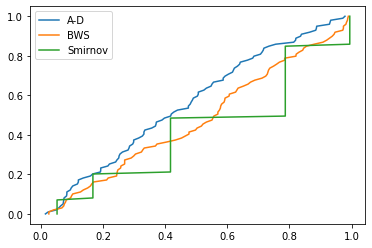

n = 50


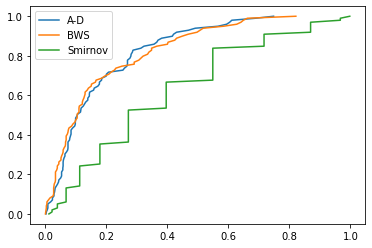

n = 100


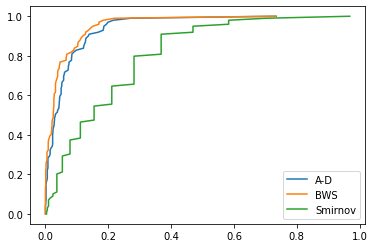

n = 1000


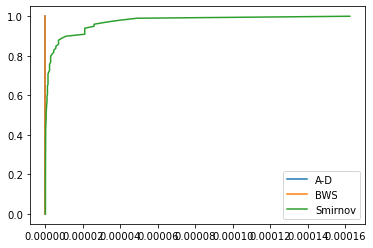

In [7]:
for n in N:
    print('n = '+str(n))
    X = []
    Y = []
    for i in range(100):
        X.append(stats.norm(0, 1).rvs(n))
        Y.append(stats.laplace.rvs(scale=math.sqrt(2), size=n))
    pv_sm = [stats.kstest(X[i], Y[i])[1] for i in range(100)]
    pv_sm.sort()
    AD_t = [n * T(sorted(X[i]), sorted(Y[i]), sorted(sorted(X[i]) + sorted(Y[i]))) for i in range(100)]
    pv_ad = [1 - Emp(AD_t[i], AD) for i in range(100)]
    pv_ad.sort()
    BWS_t = [n * T(sorted(X[i]), sorted(Y[i]), sorted(X[i])) / 2 + n * T(sorted(X[i]), sorted(Y[i]), sorted(Y[i])) / 2 for i in range(100)]
    pv_bws = [1 - Emp(BWS_t[i], BWS) for i in range(100)]
    pv_bws.sort()
    plt.plot(pv_ad, [i / 99 for i in range(100)], label = 'A-D')
    plt.plot(pv_bws, [i / 99 for i in range(100)], label = 'BWS')
    plt.plot(pv_sm, [i / 99 for i in range(100)], label = 'Smirnov')
    plt.legend()
    plt.show()

$X_i \sim \mathcal{N}(0, 1)$, $Y_i \sim Bern(0.9) * \mathcal{N}(0, 1) + (1 - Bern(0.9)) * \mathcal{N}(0, 10)$, $n = 10$

n = 10


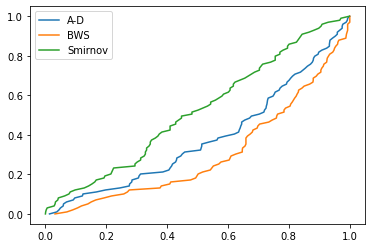

n = 50


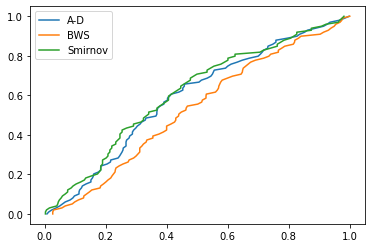

n = 100


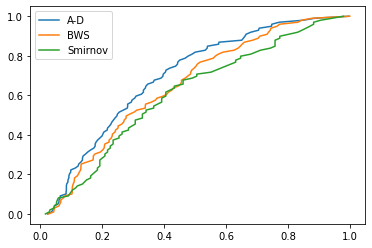

n = 1000


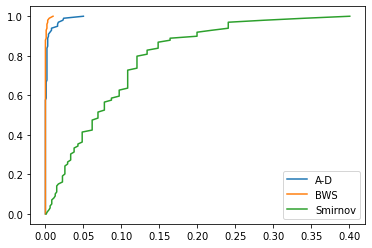

In [8]:
for n in N:
    print('n = '+str(n))
    
    Z = [stats.bernoulli(0.9).rvs(n) for i in range(100)]
    Y = [[stats.norm(0, 1).rvs() * Z[i][j] + stats.norm(0, 10).rvs() * (1 - Z[i][j]) for j in range(n)] for i in range(100)]

    for i in range(100):
        X.append(stats.norm(0, 1).rvs(n))
    pv_sm = [stats.kstest(X[i], Y[i])[1] for i in range(100)]
    pv_sm.sort()
    AD_t = [n * T(sorted(X[i]), sorted(Y[i]), sorted(sorted(X[i]) + sorted(Y[i]))) for i in range(100)]
    pv_ad = [1 - Emp(AD_t[i], AD) for i in range(100)]
    pv_ad.sort()
    BWS_t = [n * T(sorted(X[i]), sorted(Y[i]), sorted(X[i])) / 2 + n * T(sorted(X[i]), sorted(Y[i]), sorted(Y[i])) / 2 for i in range(100)]
    pv_bws = [1 - Emp(BWS_t[i], BWS) for i in range(100)]
    pv_bws.sort()
    plt.plot(pv_ad, [i / 99 for i in range(100)], label = 'A-D')
    plt.plot(pv_bws, [i / 99 for i in range(100)], label = 'BWS')
    plt.plot(pv_sm, [i / 99 for i in range(100)], label = 'Smirnov')
    plt.legend()
    plt.show()